# Analiza danych w języku Python - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa zespołu, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

In [ ]:
NAME = ""
COLLABORATORS = ""

---

## Zestaw zadań 4: Wybrane teoretyczne rozkłady prawdopodobieństwa oraz elementy teorii estymacji (Notatnik 3/3)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
import math

In [3]:
# Dane do testów 1
test_data_1 = pd.DataFrame(data=sp.stats.norm.rvs(loc=170, scale=10, size=10, random_state=47), columns=["x"])
test_data_1.head()

,x
0,161.519905
1,183.059064
2,179.242080
3,176.404118
4,159.452630


In [4]:
# Dane do testów 2
x = sp.stats.uniform.rvs(loc=-2, scale=10, size=25, random_state=34)
y = 2*x - 5 + sp.stats.norm.rvs(loc=0, scale=2, size=25, random_state=13)
test_data_2 = pd.DataFrame(data=np.array([x, y]).T, columns=["x", "y"])
test_data_2.head()

,x,y
0,-1.614383,-9.653548
1,5.801005,8.109542
2,-1.072962,-7.234931
3,4.328927,4.561478
4,-1.861092,-6.031980


### Zadanie 5: Estymacja minimalnej liczebności próby losowej do szacowania wartości średniej [5 pkt]
Przygotuj funkcję `minimal_sample_size_for_mean_estimation()`, która będzie dokonywała estymacji minimalnej liczebności próby na potrzeby estymacji przedziałowej wartości średniej dla danych wejściowych w postaci szeregu szczegółowego.

Oprócz zwracanych minimalnej liczebności próby funkcja powinna wyświetlać następujący komunikat:

`Minimalna liczebność próby niezbędna do estymacji wartości średniej na poziomie istotności 1-𝛼 = X z błędem estymacji Y wynosi Z`

gdzie X, Y i Z są wartościami automatycznie uzupełnianymi przez funkcję. Pamiętaj, że liczebność próby jest liczbą całkowitą, powinna być zatem wyświetlana bez miejsc po przecinku.

In [5]:
def minimal_sample_size_for_mean_estimation(alpha, error_level, population_std="unknown", initial_sample="none"):
    """
    Parameters
    -------
    alpha: float
        Wartość określająca poziom istotności.
    error_level: float
        Założony poziom błędu estymacji.
    population_std: str or float
        Jeżeli odchylenie standardowe populacji nie jest znane to parametr przyjmuje wartość "unknown",
        w przeciwnym wypadku jest to wartość określająca odchylenie standardowe populacji.
    initial_sample: str or DataFrame
        Zmienna zawierająca wartość "none" jeżeli znane jest odchylenie standardowe populacji,
        a w przypadku, gdy nie jest ono znane DataFrame z domyślnym indeksem i pojedynczą kolumnę "x" z wynikami próby pilotażowej.
    Returns
    -------
    n_min: int
        Minimalna liczebność próby losowej.
    """    
    
    if population_std=="unknown":
        st_d=np.std(initial_sample,ddof=1)
        n_min=math.ceil((sp.stats.t.ppf(1-alpha/2,len(initial_sample)-1)**2)*st_d**2/error_level**2)
    else:
        n_min=math.ceil((sp.stats.norm.ppf(1-alpha/2)**2)*population_std**2/error_level**2)
    print(f"Minimalna liczebność próby niezbędna do estymacji wartości średniej na poziomie istotności 1-𝛼 = {1-alpha} z błędem estymacji {error_level} wynosi {n_min}")
    return n_min



In [6]:
### Komórka testowa
assert type(minimal_sample_size_for_mean_estimation(0.01, 0.5, population_std=1.5)) == int
assert minimal_sample_size_for_mean_estimation(0.01, 0.5, population_std=1.5) == 60
assert type(minimal_sample_size_for_mean_estimation(0.02, 5, initial_sample=test_data_1)) == int
assert minimal_sample_size_for_mean_estimation(0.02, 5, initial_sample=test_data_1) == 35

Minimalna liczebność próby niezbędna do estymacji wartości średniej na poziomie istotności 1-𝛼 = 0.99 z błędem estymacji 0.5 wynosi 60
Minimalna liczebność próby niezbędna do estymacji wartości średniej na poziomie istotności 1-𝛼 = 0.99 z błędem estymacji 0.5 wynosi 60
Minimalna liczebność próby niezbędna do estymacji wartości średniej na poziomie istotności 1-𝛼 = 0.98 z błędem estymacji 5 wynosi 35
Minimalna liczebność próby niezbędna do estymacji wartości średniej na poziomie istotności 1-𝛼 = 0.98 z błędem estymacji 5 wynosi 35


### Zadanie 6: Estymacja przedziałowa współczynnika korelacji liniowej Pearsona [5 pkt]

Przygotuj funkcję `interval_correlation_estimation()`, która będzie dokonywała estymacji przedziałowej wartości współczynnika korelacji liniowej Pearsona dla danych wejściowych w postaci szeregu szczegółowego.

Oprócz zwracanych wartości granic przedziału funkcja powinna wyświetlać następujący komunikat:

`r należy do przedziału [X, Y] przy założeniu poziomu ufności 1-𝛼 = Z`

gdzie X, Y i Z są automatycznie uzupełniane przez funkcję, a X i Y dodatkowo sformatowane w taki sposób, żeby wyświetlały się z dokładnością do 4 miejsc po przecinku.

In [13]:
def interval_correlation_estimation(data, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i dwie kolumny "x" i "y" z wynikami próby losowej.
    alpha: float
        Wartość określająca poziom istotności.
    Returns
    -------
    r_corr_low: float
        Dolna granica wyliczonego przedziału ufności.
    r_corr_high: float
        Górna granica wyliczonego przedziału ufności.
    """   
    
    r=sp.stats.pearsonr(data.x,data.y).statistic
    z=math.atanh(r)

    r_corr_low=math.tanh(z-sp.stats.norm.ppf(1-alpha/2)*1/(np.sqrt(len(data)-3)))
    r_corr_high=math.tanh(z+sp.stats.norm.ppf(1-alpha/2)*1/(np.sqrt(len(data)-3)))
    print(f"r należy do przedziału [{r_corr_low: .4f},{r_corr_high: .4f}] przy założeniu poziomu ufności 1-𝛼 = {1-alpha}")
    return [r_corr_low,r_corr_high]
    # YOUR CODE HERE
    #raise NotImplementedError()


In [14]:
### Komórka testowa
assert np.all(np.isclose(interval_correlation_estimation(test_data_2, 0.05), (0.9138226321562827, 0.9832137399625539)))
assert np.all(np.isclose(interval_correlation_estimation(test_data_2, 0.02), (0.8999795459713682, 0.9856241637848772)))

r należy do przedziału [ 0.9138, 0.9832] przy założeniu poziomu ufności 1-𝛼 = 0.95
r należy do przedziału [ 0.9000, 0.9856] przy założeniu poziomu ufności 1-𝛼 = 0.98


### Zadanie 7: Estymacja współczynników równania regresji liniowej [5 pkt]

Przygotuj funkcję `interval_linear_regression_coefficients_estimation()`, która będzie dokonywała estymacji przedziałowej wartości współczynników równania regresji liniowej dla danych wejściowych w postaci szeregu szczegółowego.

Oprócz zwracanych wartości granic przedziału funkcja powinna wyświetlać następujący komunikat:

`a należy do przedziału [X1, Y1] przy założeniu poziomu ufności 1-𝛼 = Z1`
`b należy do przedziału [X2, Y2] przy założeniu poziomu ufności 1-𝛼 = Z2`

gdzie X1, X2, Y1, Y2, Z1 i Z2 są automatycznie uzupełniane przez funkcję, a X1, X2, Y1 i Y2 dodatkowo sformatowane w taki sposób, żeby wyświetlały się z dokładnością do 4 miejsc po przecinku.

In [15]:
def interval_linear_regression_coefficients_estimation(data, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i dwie kolumny "x" i "y" z wynikami próby losowej.
    alpha: float
        Wartość określająca poziom istotności.
    Returns
    -------
    a_ci: tuple
        Zmienna typu tuple zawierajaca granice przedziału ufności parametru a (a_low, a_high).
    b_ci: tuple
        Zmienna typu tuple zawierajaca granice przedziału ufności parametru b (b_low, b_high).
    """   
    # YOUR CODE HERE
    temp=sp.stats.linregress(data.x,data.y)
    y=temp.slope*data.x+temp.intercept
    s=(1/(len(data)-2))*sum((data.y-y)**2)
    a=np.sqrt(s)/np.sqrt( sum((data.x-data["x"].mean())**2) )
    b=np.sqrt(s)*np.sqrt(sum(data.x**2)/(len(data)*sum((data.x-data["x"].mean())**2)))
    a_ci=(temp.slope-sp.stats.t.ppf(1-alpha/2,len(data)-2)*a,
            temp.slope+sp.stats.t.ppf(1-alpha/2,len(data)-2)*a)
    b_ci=(temp.intercept-sp.stats.t.ppf(1-alpha/2,len(data)-2)*b,
            temp.intercept+sp.stats.t.ppf(1-alpha/2,len(data)-2)*b)
    print(f"a należy do przedziału [{a_ci[0]}, {a_ci[1]}] przy założeniu poziomu ufności 1-𝛼 = {1-alpha}\nb należy do przedziału [{b_ci[0]}, {b_ci[1]}] przy założeniu poziomu ufności 1-𝛼 = {1-alpha}")
    return [a_ci,b_ci]
    
    #raise NotImplementedError()


In [16]:
### Komórka testowa
assert np.all(np.isclose(interval_linear_regression_coefficients_estimation(test_data_2, 0.1), ((1.861113622111233, 2.283229248370173), (-5.503743260527376, -3.7484529194847234))))
print()
assert np.all(np.isclose(interval_linear_regression_coefficients_estimation(test_data_2, 0.05), ((1.8174228474380838, 2.3269200230433222), (-5.68542332638072, -3.5667728536313796))))

a należy do przedziału [1.8611136221112325, 2.2832292483701733] przy założeniu poziomu ufności 1-𝛼 = 0.9
b należy do przedziału [-5.5037432605273775, -3.7484529194847216] przy założeniu poziomu ufności 1-𝛼 = 0.9

a należy do przedziału [1.8174228474380834, 2.3269200230433227] przy założeniu poziomu ufności 1-𝛼 = 0.95
b należy do przedziału [-5.685423326380722, -3.5667728536313774] przy założeniu poziomu ufności 1-𝛼 = 0.95


### Zadanie 8: Estymacja przedziałowa regresji liniowej [10 pkt]

Przygotuj funkcję `interval_linear_regression_estimation()`, która będzie dokonywała estymacji przedziału ufności i przedziału predykcji regresji liniowej dla danych wejściowych w postaci szeregu szczegółowego.
Zaprojektuj funkcję w taki sposób, aby obliczała wartości przedziałów dla 100 wartości x równo rozłożonych od minimalnej do maksymalnej wartości x z danych wejściowych.

Następnie wykorzystaj przygotowaną funkcję do wyznaczenia przedziałów na załączonych do zadania danych i przedstaw wyniki na pojedynczym wykresie. W obliczeniach przyjmij wybrany przez siebie poziomie istotności. Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- zawrzyj na wykresie punkty, na których była prowadzona analiza, prostą regresji, granice przedziału ufności oraz granice przedziału predykcji,
- wyróżnij poszczególne elementy wykresu (w tym znajdujące się na nim punkty) różnymi kolorami (granice poszczególnych przedziałów w tym samym kolorze) i formamy linii (ciągła dla prostej regresjii, przerywane dla granic przedziałów),
- dodaj do figury legendę opisującą wszystkie elementy wykresu. Umieść w legendzie informację o wyznaczonym równaniu regresji (współczynniki sformatowane do 4 miejsc po przecinku) oraz wartości współczynnika ufności (sformatowane do 3 miejsc po przecinku) dla którego były wyznaczane przedziały.

In [17]:
def interval_linear_regression_estimation(data, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i dwie kolumny "x" i "y" z wynikami próby losowej.
    alpha: float
        Wartość określająca poziom istotności.
    Returns
    -------
    a: float
        Współczynnik równania regresji (slope).
    b: float
        Współczynnik równania regresji (intercept).
    results: DataFrame
        Tablica zawierająca domyślny indeks oraz następujące kolumny:
        x - wartości zmiennej niezależnaj, dla których określamy granice przedziału,
        y_reg - wartości y wyliczone na podstawie wartości x z wykorzystaniem wyliczonego równania regresji liniowej,
        ci_high - górne granice przedziału ufności,
        ci_low - dolne granice przedziału ufności,
        pi_high - górne granice przedziału predykcji,
        pi_low - dolne granice przedziału predykcji.
    """  
    # YOUR CODE HERE
    x_new=np.linspace(min(data["x"]),max(data["x"]),100)
    temp=sp.stats.linregress(data.x,data.y)
    a=temp.slope
    b=temp.intercept
    y=a*data.x+b
    t = sp.stats.t.ppf(1-alpha/2, len(data)-2)
    s=(1/(len(data)-2))*sum((data.y-y)**2)

    
    temp_dol=sum((data.x- np.sum(data['x']) / len(data))**2)
    
    D = np.sqrt(s) * np.sqrt(1/len(data) + (x_new- np.sum(data['x']) / len(data))**2/temp_dol)
    y2=a*x_new+b
    ci_low = y2 - t * D
    ci_high = y2 + t * D
    
    D2=  np.sqrt(s) * np.sqrt(1 + 1/len(data) + (x_new- np.sum(data['x']) / len(data))**2/temp_dol)
    pi_low = y2 - t * D2
    pi_high = y2 + t * D2

    results = pd.DataFrame({'x': x_new, 'y_reg': y2, 'ci_high': ci_high,
                           'ci_low': ci_low, 'pi_high': pi_high, 'pi_low': pi_low})
    return [a,b,results]
    #raise NotImplementedError()


In [18]:
### Komórka testowa
a, b , results = interval_linear_regression_estimation(test_data_2, 0.05)
assert np.isclose(a, 2.072171435240703)
assert np.isclose(b, -4.6260980900060495)
assert results.shape == (100, 6)
assert len(set(list(results.columns)) & set(['x', 'y_reg', 'ci_high', 'ci_low', 'pi_high', 'pi_low'])) == 6
assert np.all(np.isclose(results[['x', 'y_reg', 'ci_high', 'ci_low', 'pi_high', 'pi_low']].min().values, np.array([-1.8657939, -8.49234292, -7.06370958, -9.92097626, -4.39199716, -12.59268868]))) == True
assert np.all(np.isclose(results[['x', 'y_reg', 'ci_high', 'ci_low', 'pi_high', 'pi_low']].max().values, np.array([7.4114666, 10.73173129, 12.12260347, 9.34085912, 14.81907365, 6.64438894]))) == True
assert np.all(np.isclose(results[['x', 'y_reg', 'ci_high', 'ci_low', 'pi_high', 'pi_low']].mean().values, np.array([2.77283635, 1.11969419, 2.13259929, 0.10678908, 5.09904685, -2.85965848]))) == True

In [19]:
# Dane do wykresu
x = sp.stats.uniform.rvs(loc=-3, scale=12, size=50, random_state=18)
y = -1.25*x + 7 + sp.stats.norm.rvs(loc=0, scale=3, size=50, random_state=67)
data = pd.DataFrame(data=np.array([x, y]).T, columns=["x", "y"])
data.head()

,x,y
0,4.804491,4.379953
1,3.065440,3.600776
2,7.543218,-5.774798
3,-0.817917,11.715536
4,7.226797,-2.497470


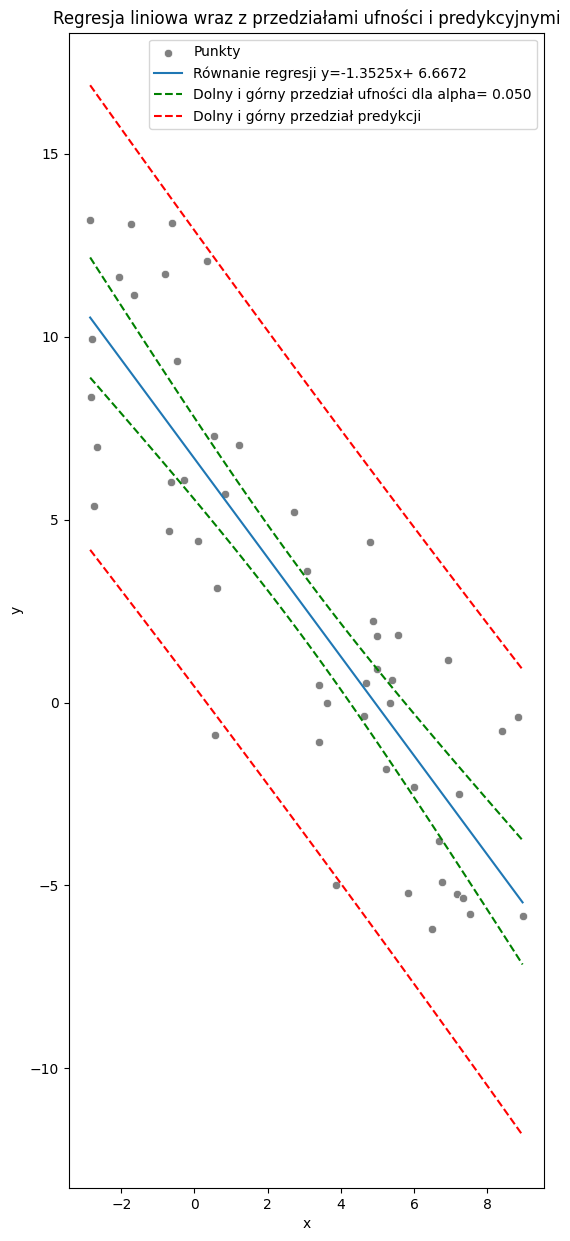

In [27]:
# Wykres
# YOUR CODE HERE
alpha=0.05
a, b, results = interval_linear_regression_estimation(data, alpha)

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Regresja liniowa wraz z przedziałami ufności i predykcyjnymi')
sns.scatterplot(data, x='x', y='y', color='grey', label='Punkty')
plt.plot(results['x'], results['y_reg'], label=f'Równanie regresji y={a: .4f}x+{b: .4f}')
plt.plot(results['x'], results['ci_low'], color='green', linestyle='dashed', label=f'Dolny i górny przedział ufności dla alpha={alpha: .3f}')
plt.plot(results['x'], results['ci_high'], color='green', linestyle='dashed')
plt.plot(results['x'], results['pi_low'], color='red', linestyle='dashed', label='Dolny i górny przedział predykcji')
plt.plot(results['x'], results['pi_high'], color='red', linestyle='dashed')

ax.set_aspect(1)
plt.legend()
plt.show()